In [8]:
__author__ = "Arkadiusz Wos"
__copyright__ = "Arkadiusz Wos"
__version__ = "1.0 30.01.2018"
__email__ = "arkadiusz.wos@gmail.com"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



#to print multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
# Set variables (files path and separator)

In [10]:
games_file = r'/home/arek/Desktop/gaming_test/Test - Business Intelligence Analyst/games.csv'
organizations_file = r'/home/arek/Desktop/gaming_test/Test - Business Intelligence Analyst/organizations.csv'
fact_bets_file = r'/home/arek/Desktop/gaming_test/Test - Business Intelligence Analyst/fact_bets.csv'
separator = ';'


# Table of contents

1. [Data analyst](#Data analyst)      
    1. [Pie chart Channel source](#Channel source)
    1. [Pie chart Channel source income](#Channel source income)
    1. [Chart of impact of mobile devices ](#mobile devices)
    1. [Heat map user activity in 2016](#activity in 2016)
    1. [Heat map user activity in 2017](#activity in 2017)
    1. [Line charts for level of interest in each game](#each game)
    1. [Table of the most popular currency with bar chart](#popular currency)
    1. [Table of the most profitable currnecy with bar chart](#profitable currnecy)
    1. [Table of games with the most bets](#popular games)
    1. [Table of games with the biggest profit](#profitable games)
    1. [Table of organization with the biggest profit](#profitable organization)
    1. [Table of organization group with the biggest profit](#profitable organization group)
    1. [Table of campaign with the biggest profit](#profitable campaign)
    1. [Table of the best player](#best player)
    1. [Chart of behavior of the best player](#best player)
    1. [Chart of behavior of the worst player](#worst player)
    
1. [Prediction](#Prediction)




In [11]:
# Data cleaning

In [12]:
 # "games" file 

In [13]:
games_df = pd.read_csv(games_file, sep=separator)

In [14]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
id_game       44 non-null int64
game          44 non-null object
rtp           44 non-null float64
volatility    44 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.5+ KB


In [15]:
# memory optimization

In [16]:
games_df.describe()

,id_game,rtp,volatility
count,44.000000,44.000000,44.000000
mean,7493.750000,0.957541,84.068182
std,206.711475,0.006045,78.813409
min,7428.000000,0.938000,34.000000
25%,7438.750000,0.956000,48.000000
50%,7450.500000,0.957000,58.500000
75%,7461.250000,0.959000,80.750000
max,8429.000000,0.975000,410.000000


In [17]:
def optimize_memory(df):
    for int8 in []:
        #Byte (-128 to 127)
        df[int8] = df[int8].astype('int8') 
    for int16 in ['id_game','volatility']:
        #Integer (-32768 to 32767)
        df[int16] = df[int16].astype('int16')
    for int32 in []:
        #Integer (-2147483648 to 2147483647)
        df[int32] = df[int32].astype('int32')
    for float16 in ['rtp']:
        #Half precision float: sign bit, 5 bits exponent, 10 bits mantissa
        df[float16] = df[float16].astype('float16')
    for float32 in []:
        #Single precision float: sign bit, 8 bits exponent, 23 bits mantissa
        df[float32] = df[float32].astype('float32')
    return df

games_df = optimize_memory(games_df)
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
id_game       44 non-null int16
game          44 non-null object
rtp           44 non-null float16
volatility    44 non-null int16
dtypes: float16(1), int16(2), object(1)
memory usage: 696.0+ bytes


In [18]:
games_df.sample(10)

,id_game,game,rtp,volatility
25,8428,game_26,0.957031,63
28,7467,game_29,0.957031,50
15,7444,game_16,0.955078,36
18,7428,game_19,0.975098,410
1,7460,game_2,0.960938,72
27,7462,game_28,0.956055,38
12,7451,game_13,0.937988,92
21,7452,game_22,0.955078,43
20,7464,game_21,0.956055,42
22,7454,game_23,0.956055,103


In [19]:
# "organization" file 

In [20]:
organizations_df = pd.read_csv(organizations_file, sep=separator)
organizations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 2 columns):
organization          510 non-null object
organization_group    510 non-null object
dtypes: object(2)
memory usage: 8.0+ KB


In [21]:
organizations_df.sample(10)

,organization,organization_group
489,organization_227,group_78
92,organization_105,group_13
333,organization_235,group_42
166,organization_399,group_21
473,organization_444,group_74
185,organization_1,group_25
156,organization_190,group_21
505,organization_493,group_83
278,organization_159,group_38
31,organization_31,group_9


In [22]:
# "fact_bets" file 

In [23]:
fact_bets_df = pd.read_csv(fact_bets_file, sep=separator)

#drop and add columns
fact_bets_df.drop(['date'],axis=1, inplace = True)
fact_bets_df['profit_euro'] = fact_bets_df['bet_euro'] - fact_bets_df['win_euro']
fact_bets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41044 entries, 0 to 41043
Data columns (total 11 columns):
slice_from        41044 non-null object
organization      41044 non-null object
id_game           41044 non-null int64
channel           41044 non-null object
currency          41044 non-null object
bet_euro          41044 non-null float64
win_euro          41044 non-null float64
number_of_bets    41044 non-null int64
userid            41044 non-null int64
campaignid        41044 non-null int64
profit_euro       41044 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 3.4+ MB


In [24]:
fact_bets_df.describe()

,id_game,bet_euro,win_euro,number_of_bets,userid,campaignid,profit_euro
count,41044.000000,41044.000000,41044.000000,41044.000000,4.104400e+04,4.104400e+04,41044.000000
mean,7459.406101,223.005161,210.397658,86.560447,1.739935e+18,5.795915e+16,12.607503
std,91.949091,1380.956342,1353.550095,144.161264,9.485499e+17,3.093431e+17,395.431780
min,7428.000000,0.000000,0.000000,1.000000,1.402032e+18,0.000000e+00,-13120.000000
25%,7444.000000,4.000000,1.230000,9.000000,1.602041e+18,0.000000e+00,-0.050000
50%,7451.000000,21.600000,13.200000,36.000000,1.609231e+18,0.000000e+00,3.580000
75%,7458.000000,87.500000,72.707500,101.000000,1.703231e+18,0.000000e+00,19.500000
max,8429.000000,122000.000000,108500.000000,3939.000000,9.012172e+18,1.711301e+18,18933.600000


In [25]:
# memory optimization

In [26]:
def optimize_memory(df):
    for int8 in []:
        #Byte (-128 to 127)
        df[int8] = df[int8].astype('int8') 
    for int16 in ['id_game','number_of_bets']:
        #Integer (-32768 to 32767)
        df[int16] = df[int16].astype('int16')
    for int32 in []:
        #Integer (-2147483648 to 2147483647)
        df[int32] = df[int32].astype('int32')
    for float16 in []:
        #Half precision float: sign bit, 5 bits exponent, 10 bits mantissa
        df[float16] = df[float16].astype('float16')
    for float32 in []:
        #Single precision float: sign bit, 8 bits exponent, 23 bits mantissa
        df[float32] = df[float32].astype('float32')
    return df

fact_bets_df = optimize_memory(fact_bets_df)
fact_bets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41044 entries, 0 to 41043
Data columns (total 11 columns):
slice_from        41044 non-null object
organization      41044 non-null object
id_game           41044 non-null int16
channel           41044 non-null object
currency          41044 non-null object
bet_euro          41044 non-null float64
win_euro          41044 non-null float64
number_of_bets    41044 non-null int16
userid            41044 non-null int64
campaignid        41044 non-null int64
profit_euro       41044 non-null float64
dtypes: float64(3), int16(2), int64(2), object(4)
memory usage: 3.0+ MB


In [27]:
# "all_df" joined table

In [28]:
#joined all data
all_df = fact_bets_df.set_index('id_game', drop=False).join(games_df.set_index('id_game'))
all_df = all_df.set_index('organization',drop=False).join(organizations_df.set_index('organization'))

all_df['slice_from'] = pd.to_datetime(all_df['slice_from'], format ='%Y-%m-%d %H:%M:%S')
all_df['Year'] = all_df['slice_from'].apply(lambda x: x.year).astype('int16')
all_df['Hour'] = all_df['slice_from'].apply(lambda x: x.hour).astype('int8')
all_df['Month'] = all_df['slice_from'].apply(lambda x: x.month).astype('int8')
all_df['Day of Week'] = all_df['slice_from'].apply(lambda x: x.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
all_df['Day of Week'] = all_df['Day of Week'].map(dmap)

#drop "id_game" column
all_df.drop(['id_game'],axis=1, inplace = True)

#dummy var
all_df['dummy_var']= 1
all_df['dummy_var'] = all_df['dummy_var'].astype('int8');

In [29]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41044 entries, organization_100 to organization_98
Data columns (total 19 columns):
slice_from            41044 non-null datetime64[ns]
organization          41044 non-null object
channel               41044 non-null object
currency              41044 non-null object
bet_euro              41044 non-null float64
win_euro              41044 non-null float64
number_of_bets        41044 non-null int16
userid                41044 non-null int64
campaignid            41044 non-null int64
profit_euro           41044 non-null float64
game                  41044 non-null object
rtp                   41044 non-null float16
volatility            41044 non-null int16
organization_group    41044 non-null object
Year                  41044 non-null int16
Hour                  41044 non-null int8
Month                 41044 non-null int8
Day of Week           41044 non-null object
dummy_var             41044 non-null int8
dtypes: datetime64[ns](1), float16

In [30]:
all_df.sample(5)

,slice_from,organization,channel,currency,bet_euro,win_euro,number_of_bets,userid,campaignid,profit_euro,game,rtp,volatility,organization_group,Year,Hour,Month,Day of Week,dummy_var
organization,,,,,,,,,,,,,,,,,,,
organization_85,2017-05-20 16:00:00,organization_85,DESKTOP,EUR,11.25,20.79,45,1705101745570200177,0,-9.54,game_41,0.956055,54,group_42,2017,16,5,Sat,1
organization_462,2016-06-24 20:00:00,organization_462,DESKTOP,EUR,0.50,0.00,2,1511181023437900177,0,0.50,game_42,0.958008,48,group_78,2016,20,6,Fri,1
organization_366,2017-03-26 10:00:00,organization_366,DESKTOP,EUR,11.00,12.25,44,1703091056210100204,0,-1.25,game_15,0.958984,68,group_64,2017,10,3,Sun,1
organization_446,2016-05-28 20:00:00,organization_446,DESKTOP,EUR,148.75,106.75,119,1511202139561800254,0,42.00,game_42,0.958008,48,group_12,2016,20,5,Sat,1
organization_267,2016-05-11 18:00:00,organization_267,DESKTOP,EUR,5.00,0.60,4,1603021933501500291,0,4.40,game_42,0.958008,48,group_48,2016,18,5,Wed,1


## 1. Data analyst <a name="Data analyst"></a>

### Base information

#### Comapny have:
#### 44 organization group
#### 133 organization
#### 42 games
#### 4790 users
#### 17 types of cuurency in bets
#### 17 campaigns carried out

In [31]:
def find_clusters(df):
    for column in df.columns:
        print ("{}: {}".format(column,df[column].nunique()))
        
find_clusters(all_df)

slice_from: 10673
organization: 133
channel: 2
currency: 17
bet_euro: 7485
win_euro: 15280
number_of_bets: 940
userid: 4790
campaignid: 126
profit_euro: 20381
game: 42
rtp: 13
volatility: 34
organization_group: 44
Year: 3
Hour: 24
Month: 12
Day of Week: 7
dummy_var: 1


### Pie chart Channel source <a name="Channel source"></a>


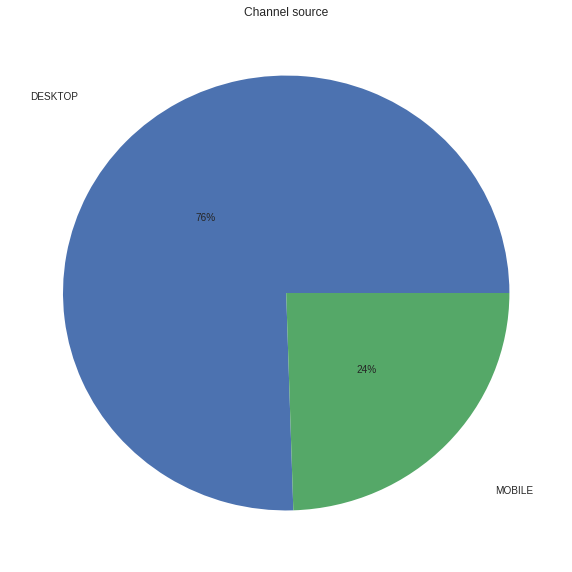

In [32]:
labels = all_df['channel'].unique()
data = all_df.groupby('channel')['channel'].count()

plt.figure(figsize=(10,10))
plt.pie(data, labels= labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.3)
plt.title("Channel source");

### Chart of impact of mobile devices <a name="mobile devices"></a>

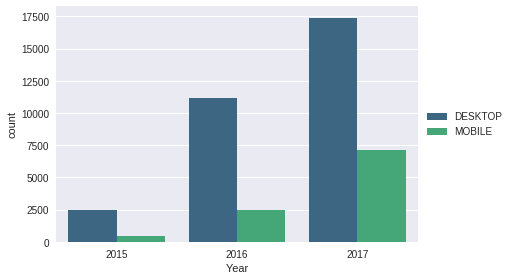

In [33]:
sns.countplot(x='Year',data=all_df, hue = 'channel', palette = "viridis")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout();

### Pie chart Channel source income <a name="Channel source income"></a>

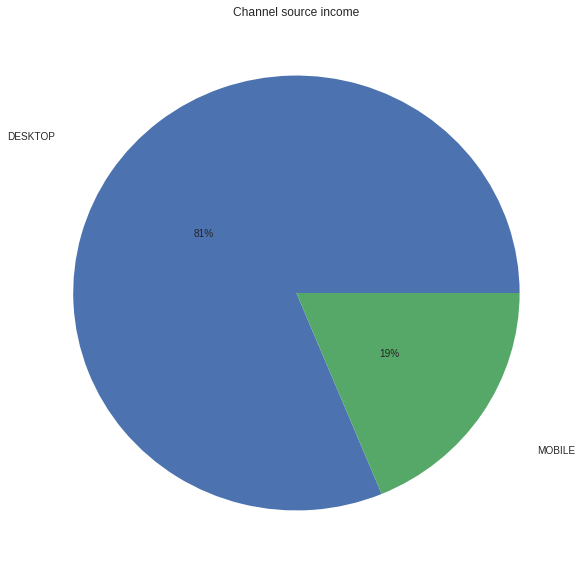

In [34]:
labels = all_df['channel'].unique()
data = all_df.groupby('channel')['profit_euro'].sum()
plt.figure(figsize=(10,10))
plt.pie(data, labels= labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.3)
plt.title("Channel source income");

#### Comments:
#### Desktop games predominate in earnings and popularity, but there is a stron trend in the growth of mobile games

### Heat maps of user activity grouped by day of week and hour
#### Comments:
#### Warning! Lack of consistency in the data. 2015 and the first quarter of 2016 do not have information about hours. Significant activity in the afternoon, these hours need more support staff. The servers can be serviced at early morning.

### Heat map user activity in 2016 <a name="activity in 2016"></a>

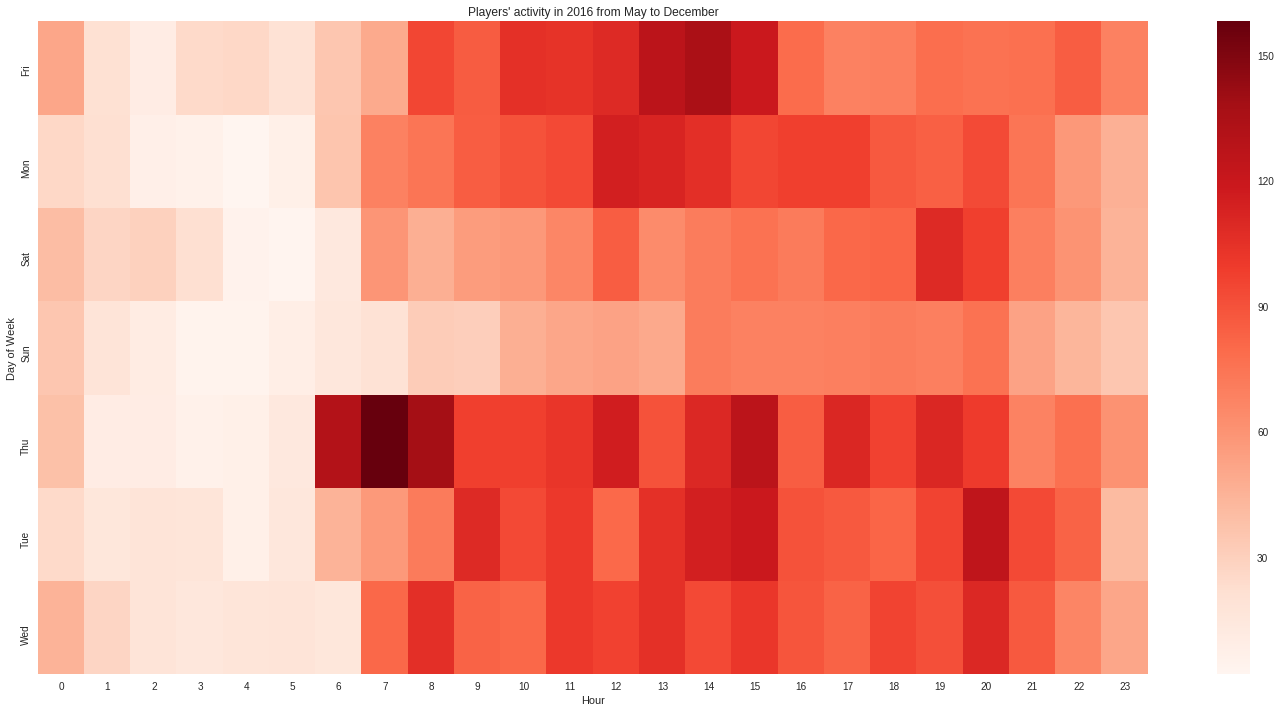

In [35]:
#a special case due to wrong data for "0" hour from 01 to 04 month of 2016
year_var = 2016

all_2016 = all_df[all_df.Year == year_var]
grupped_by_day = all_2016[all_2016.Month > 4].groupby(by=['Day of Week','Hour']).count()['dummy_var'].unstack(level = 'Hour')
plt.figure(figsize = (20,10))
sns.heatmap(grupped_by_day, cmap = 'Reds')\
.set_title("Players' activity in {} from May to December".format(year_var))
plt.tight_layout();

### Heat map user activity in 2017 <a name="activity in 2017"></a>

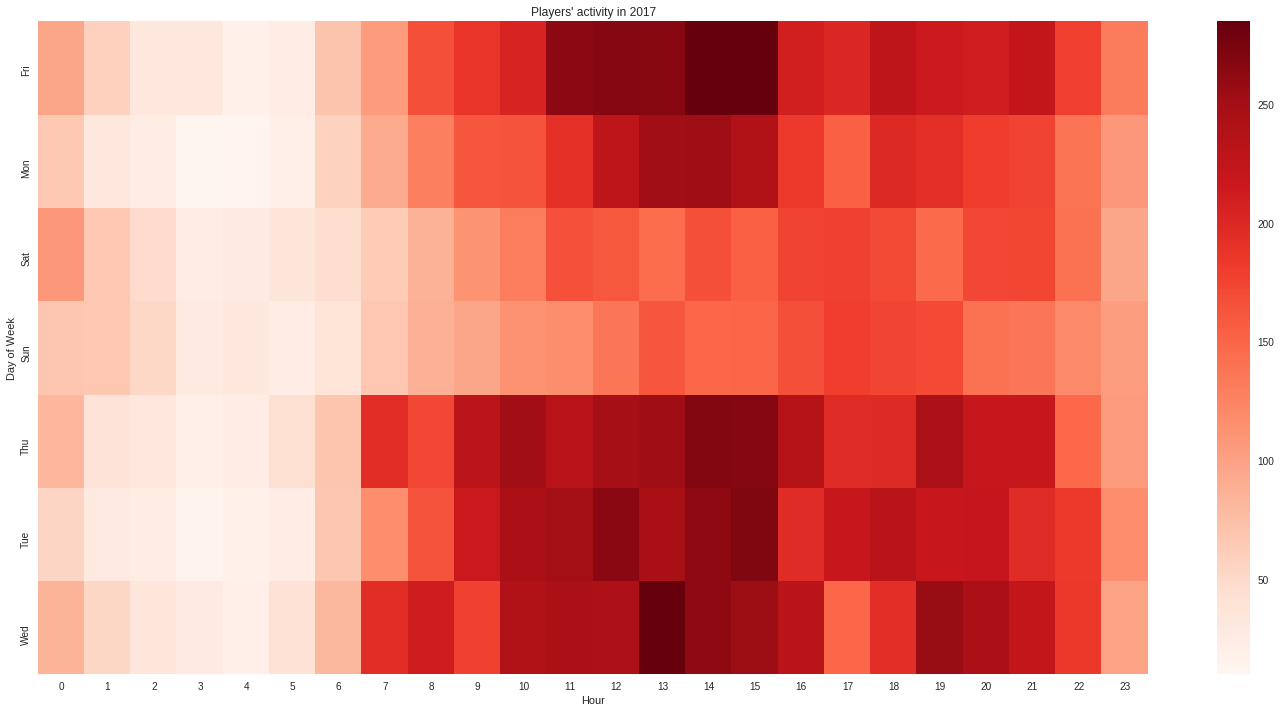

In [36]:
year_var = 2017

grupped_by_day = all_df[all_df.Year == year_var].groupby(by=['Day of Week','Hour']).count()['dummy_var'].unstack(level = 'Hour')
plt.figure(figsize = (20,10))
sns.heatmap(grupped_by_day, cmap = 'Reds').set_title("Players' activity in {}".format(year_var))
plt.tight_layout();

### Line charts for level of interest in each game  <a name="each game"></a>

#### Comment:
#### Plase use slider to see charts for all games. Most of the games have the tendency to exhausted during the year.

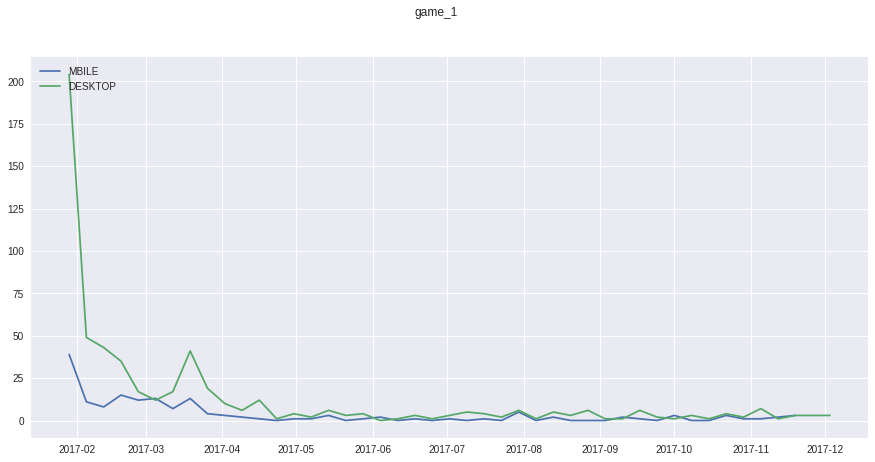

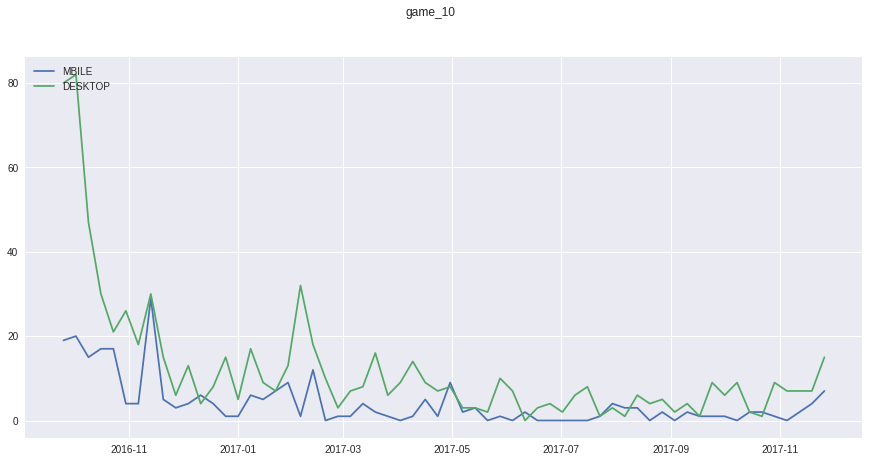

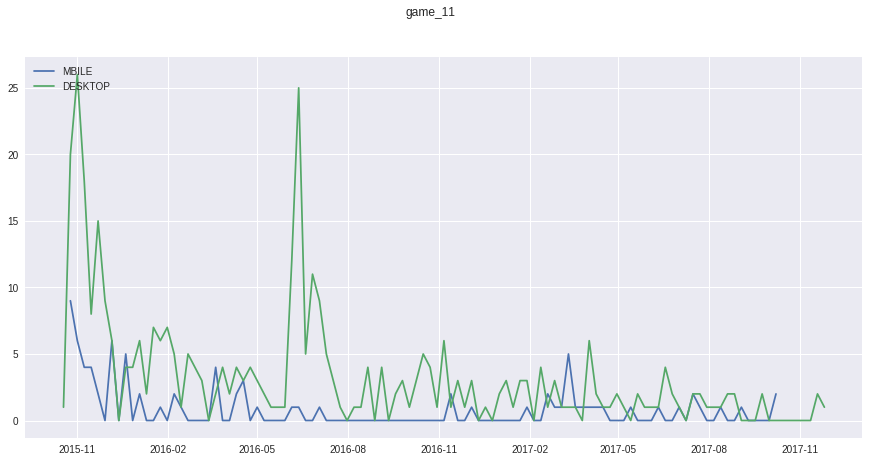

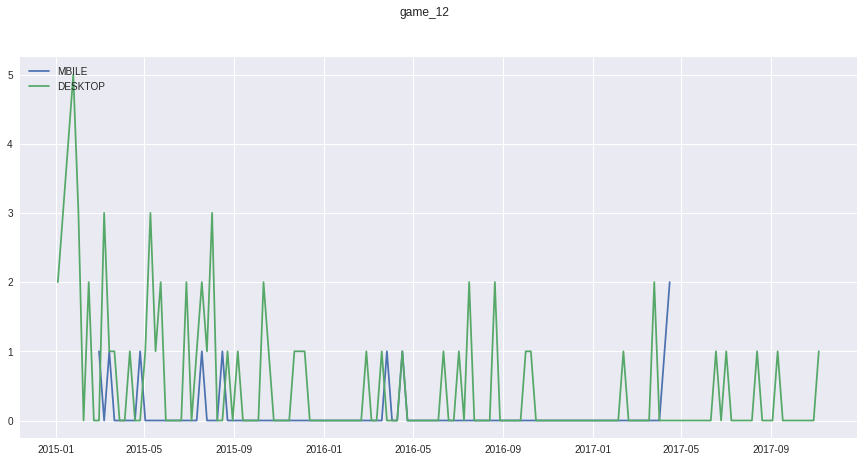

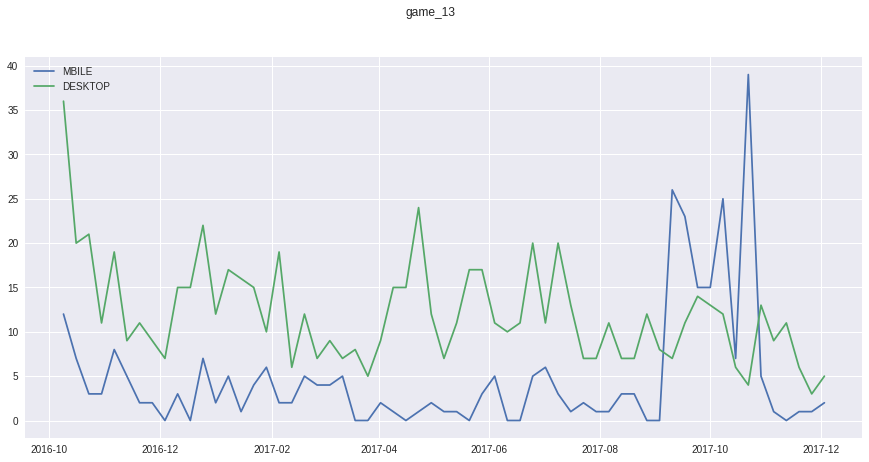

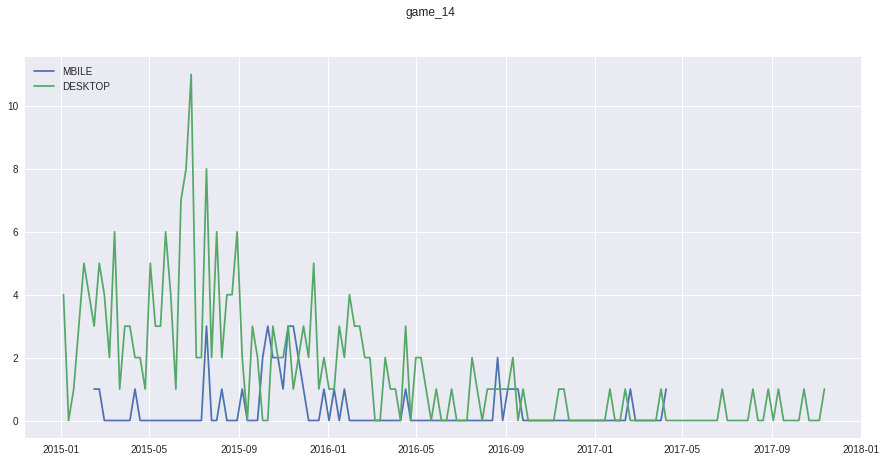

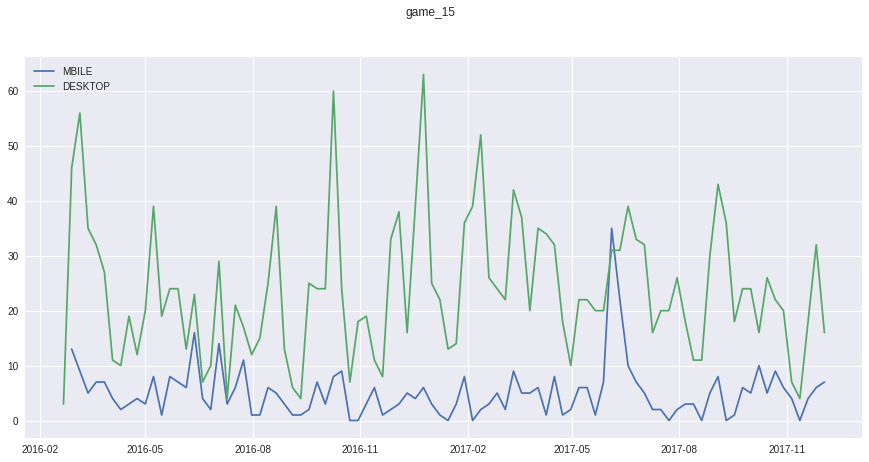

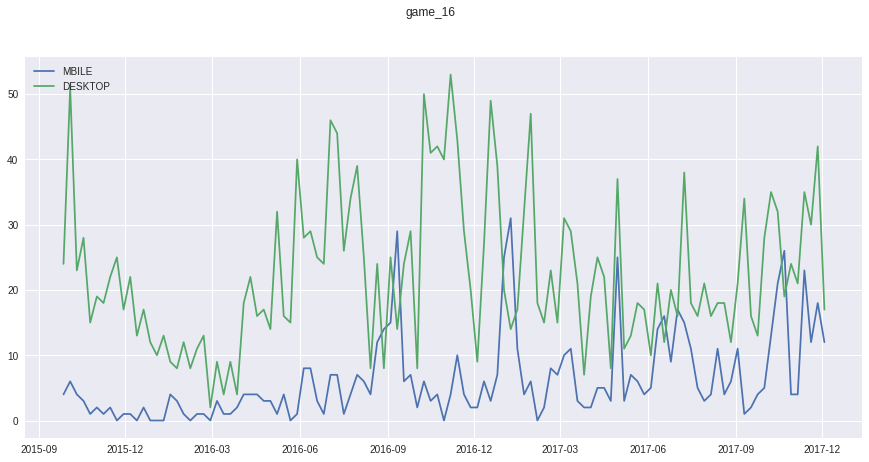

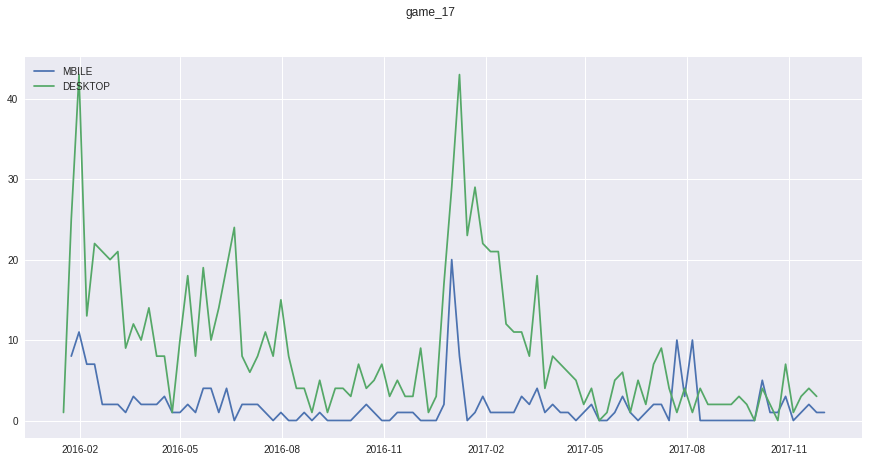

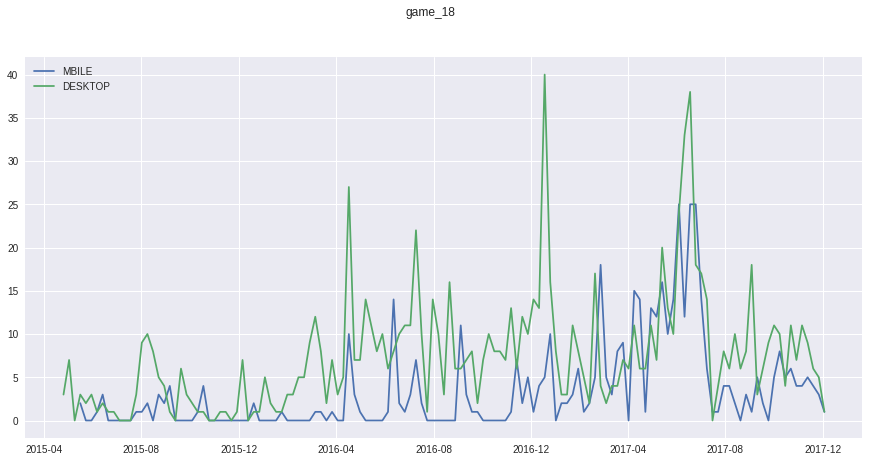

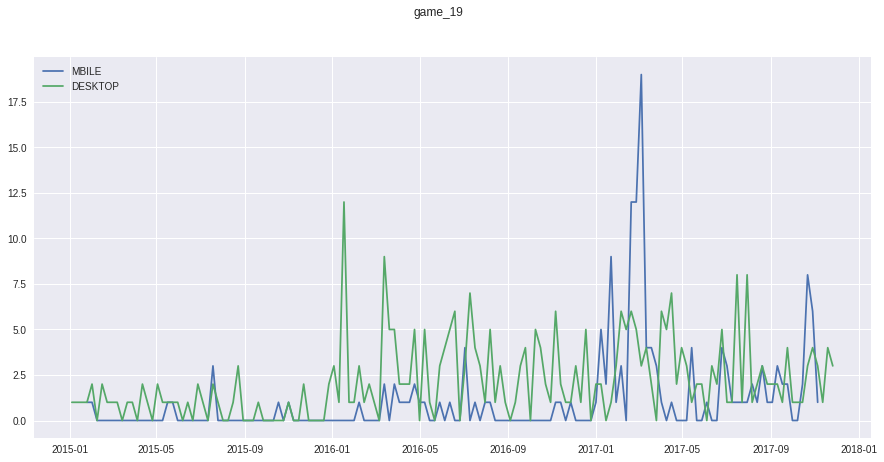

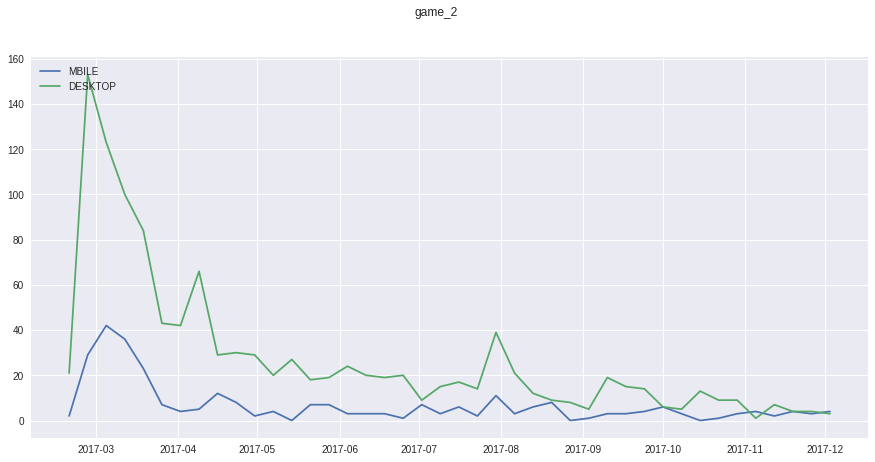

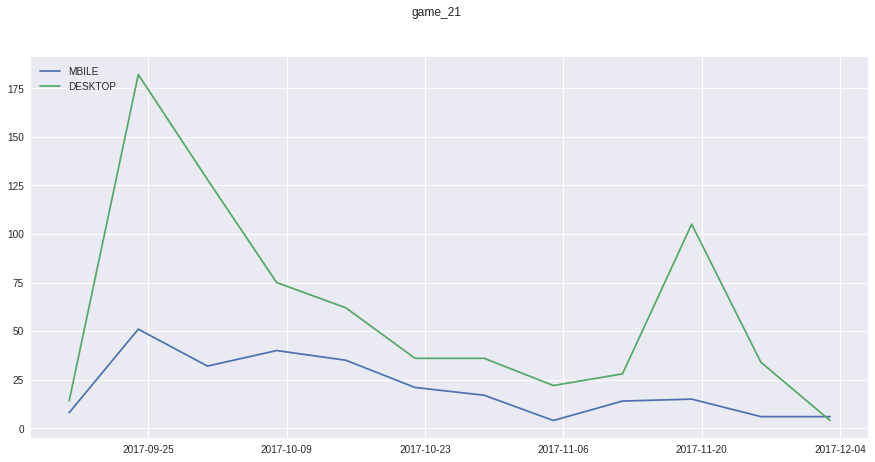

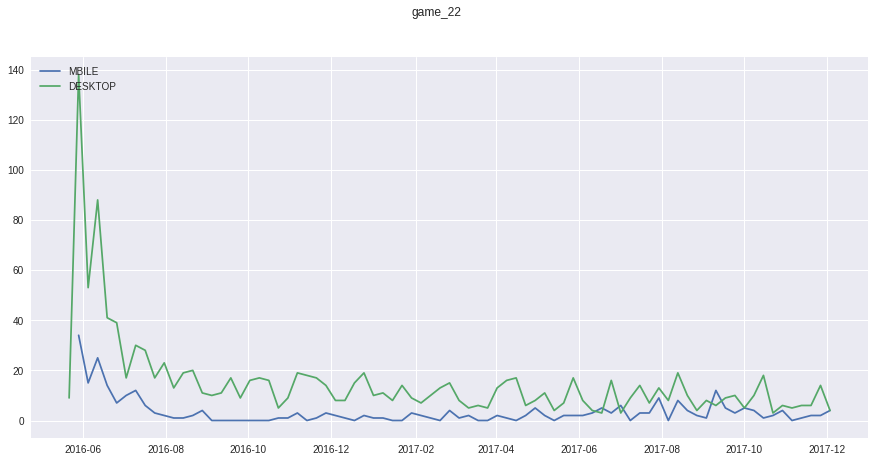

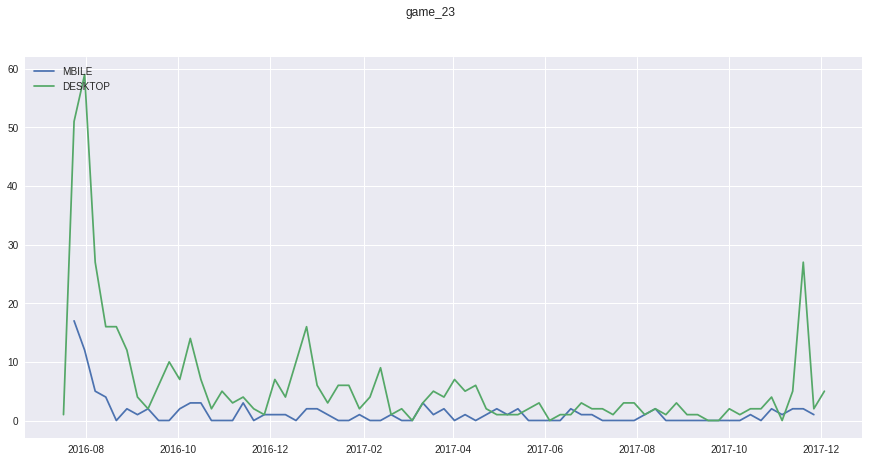

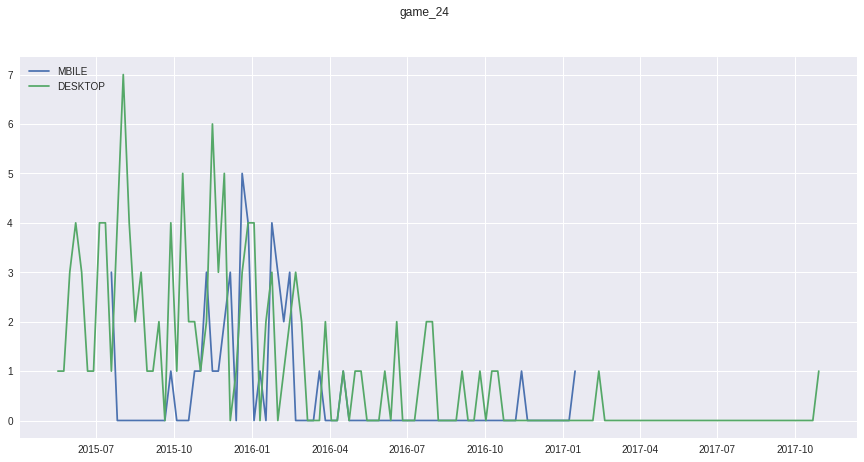

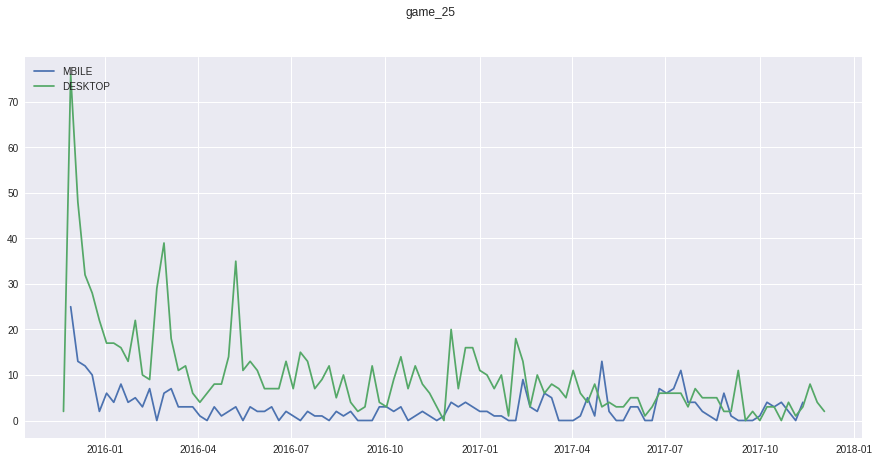

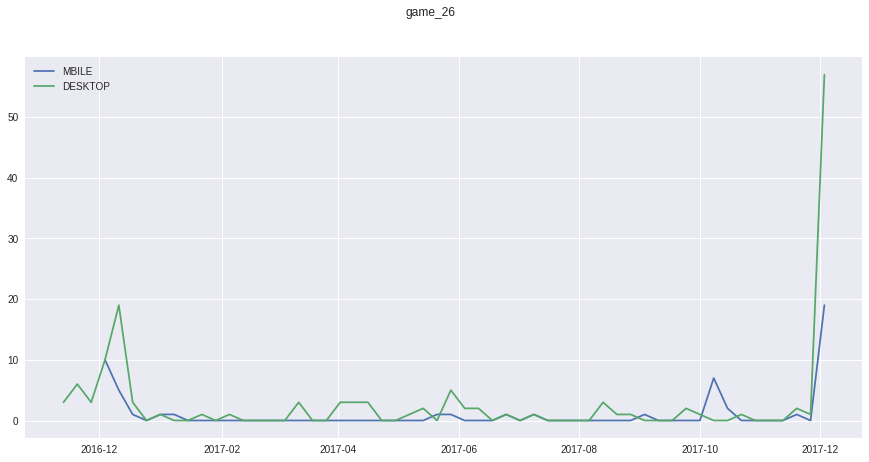

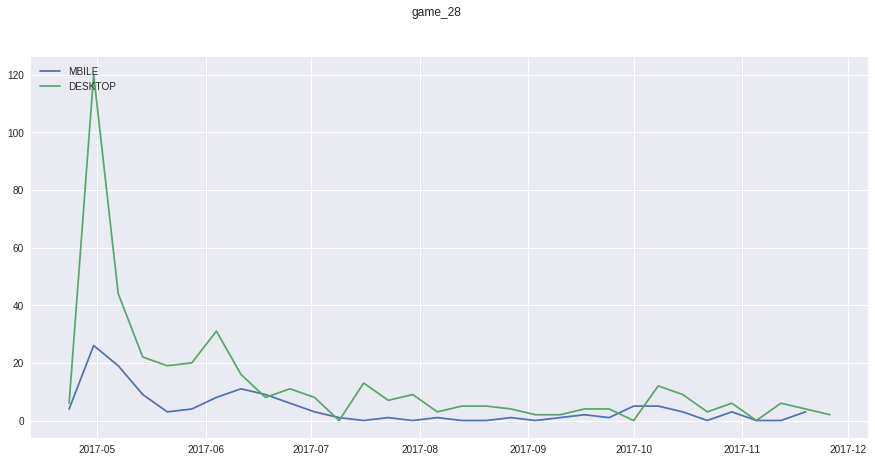

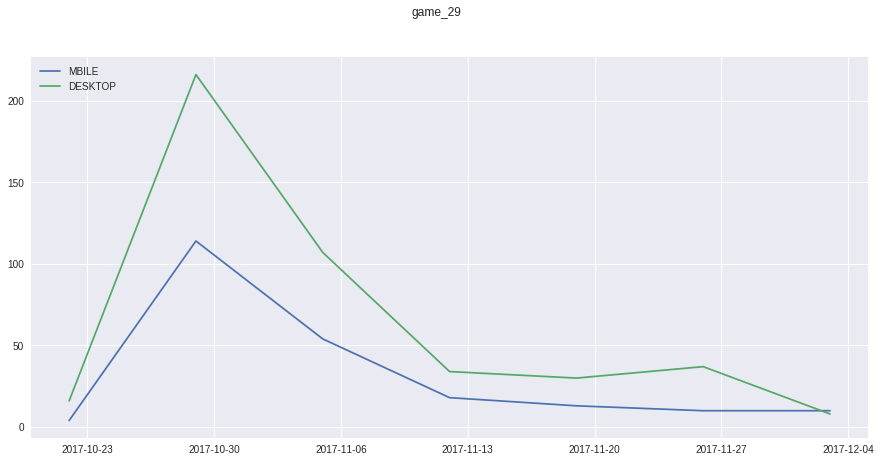

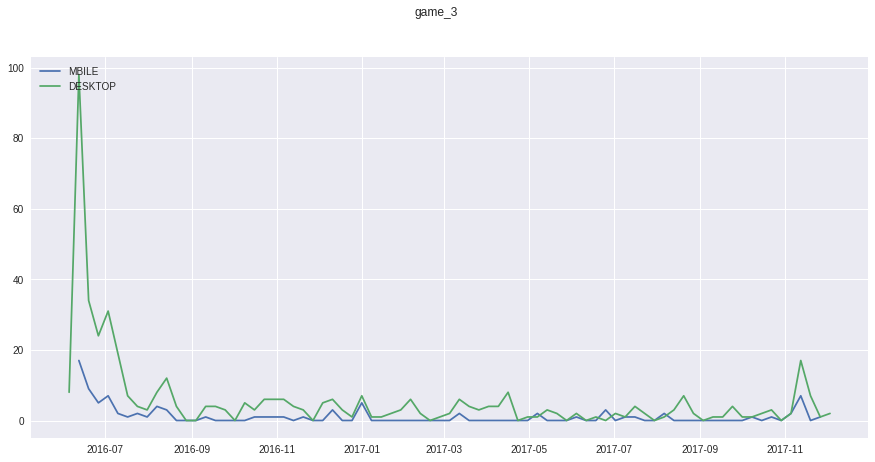

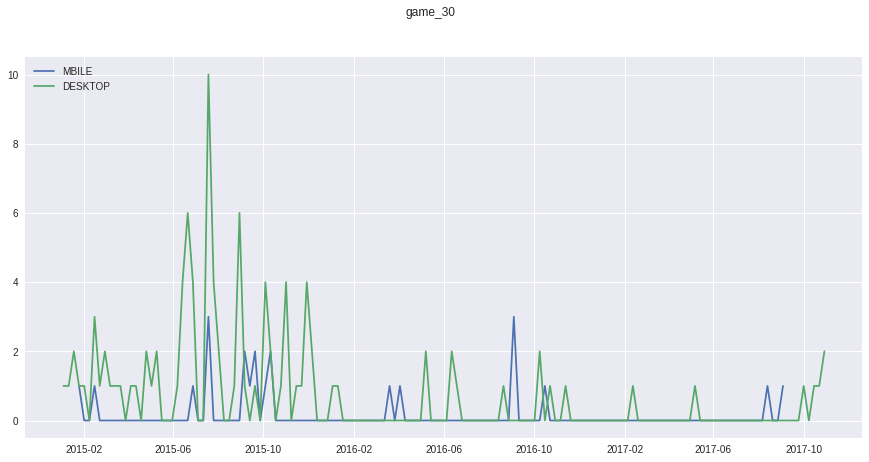

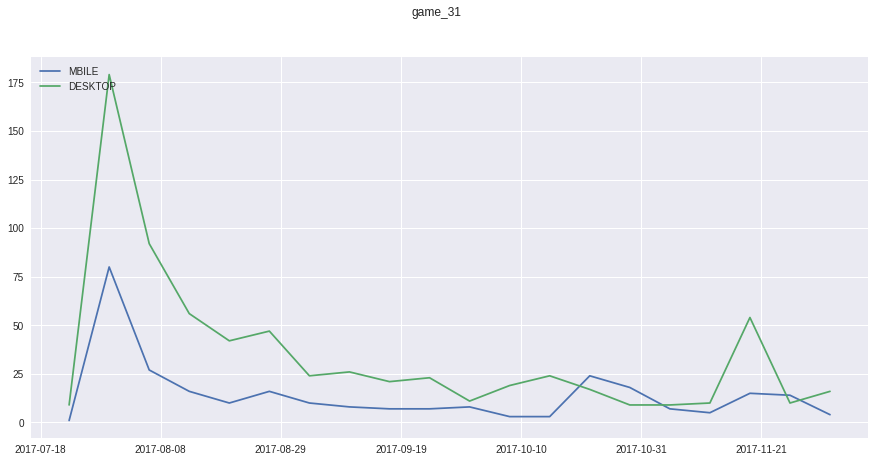

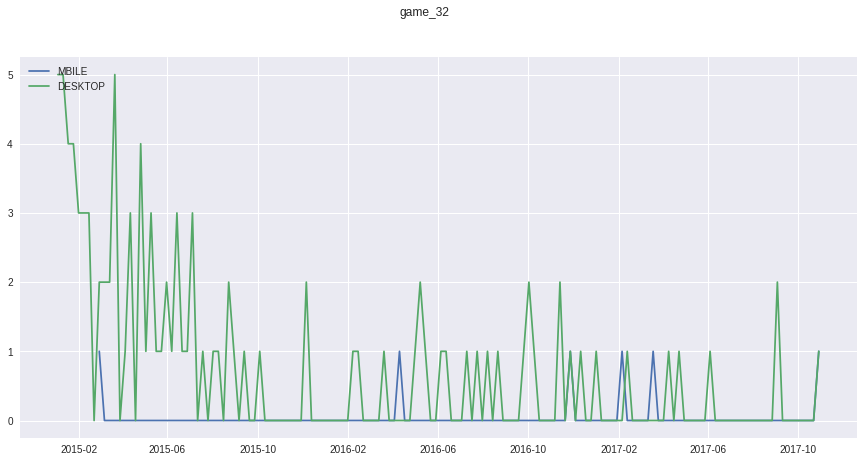

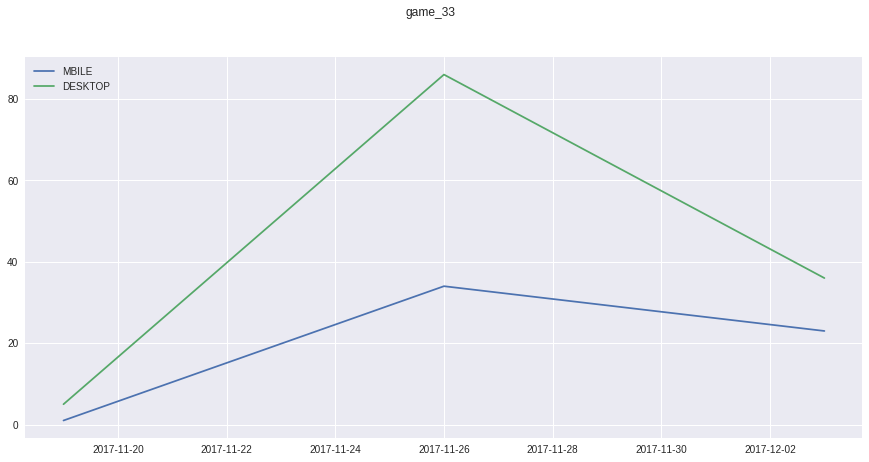

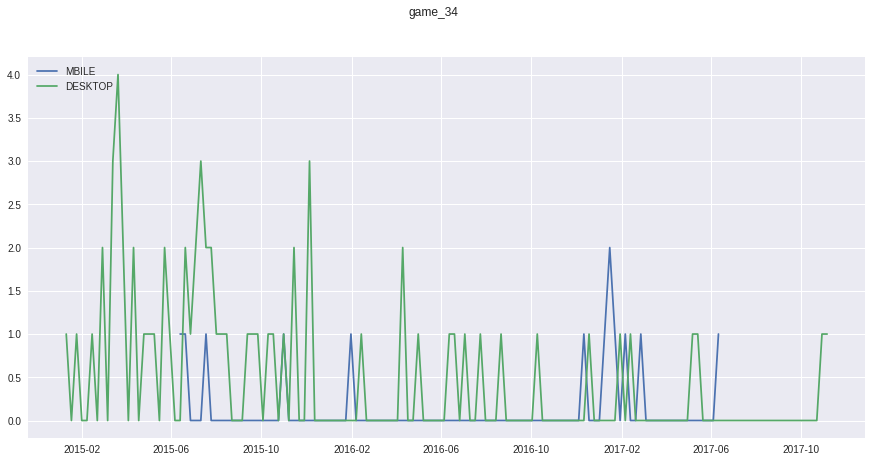

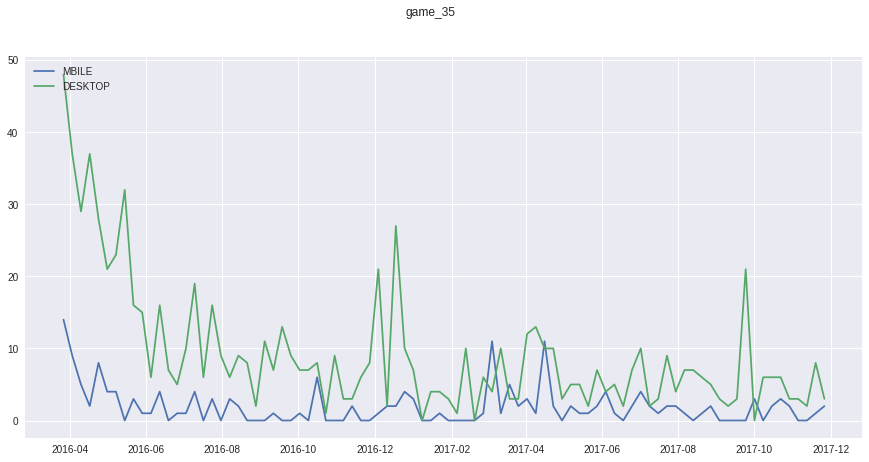

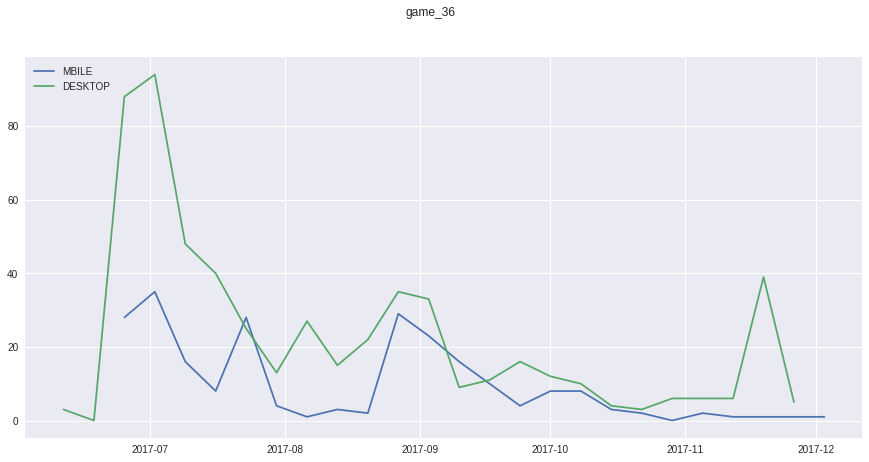

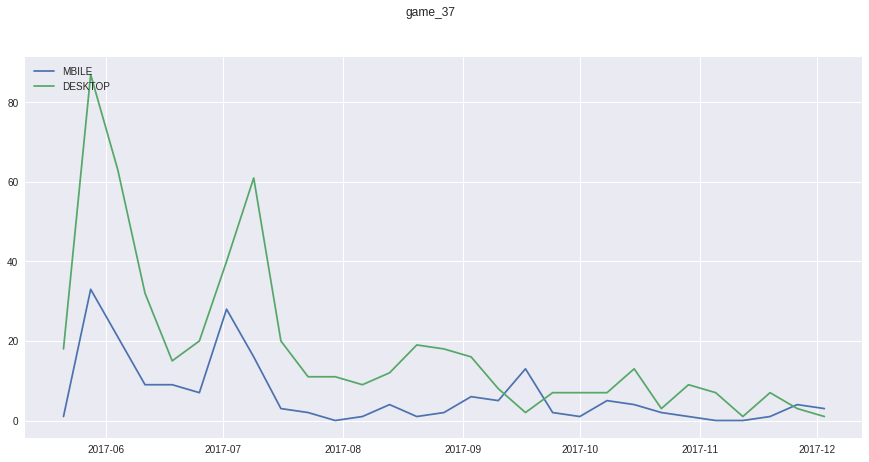

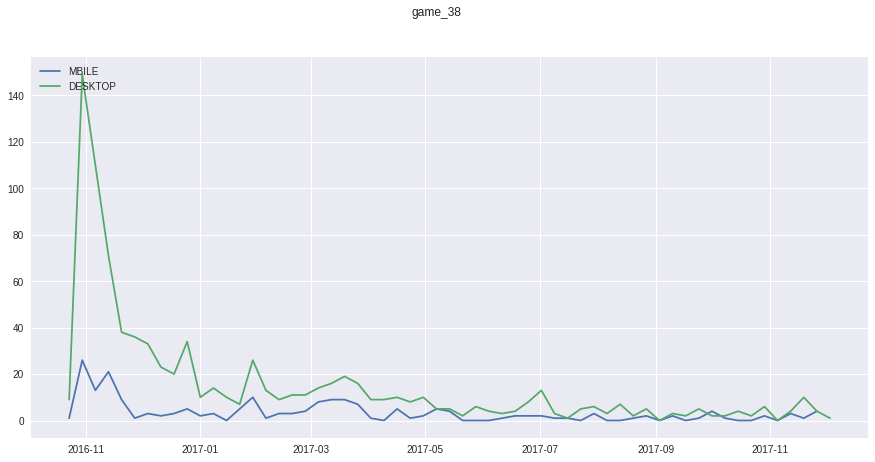

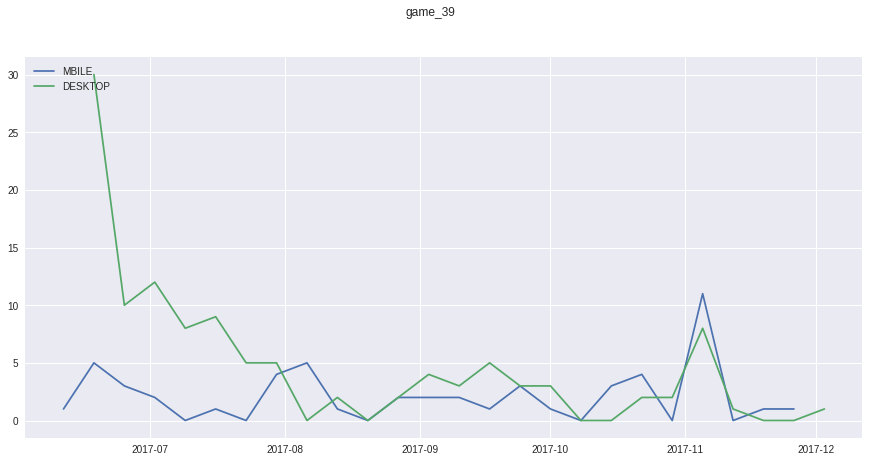

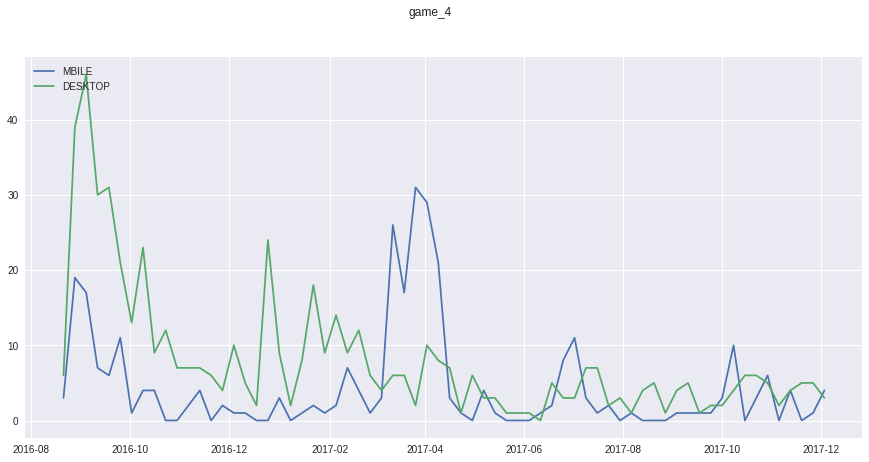

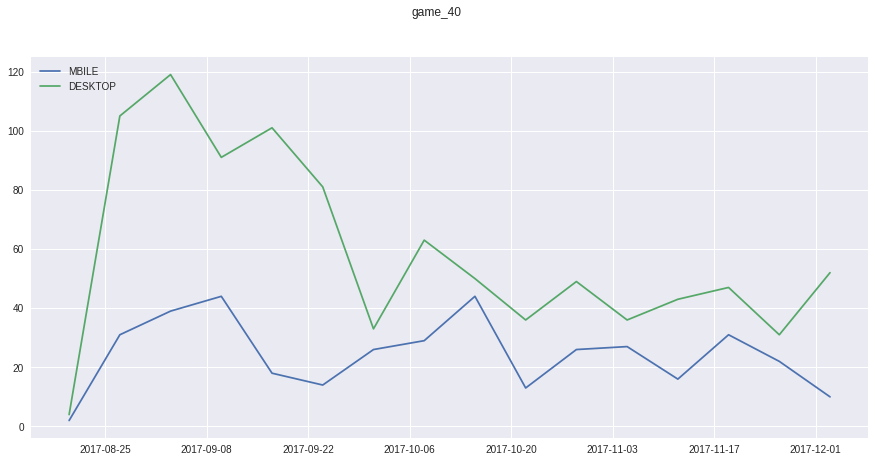

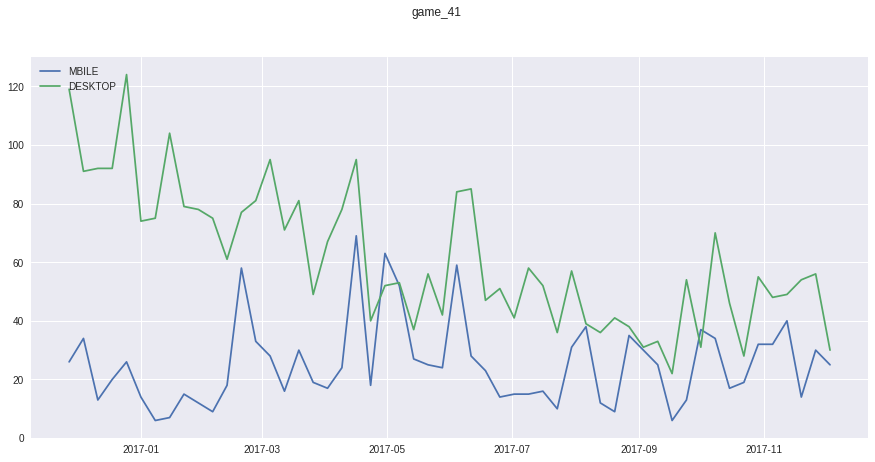

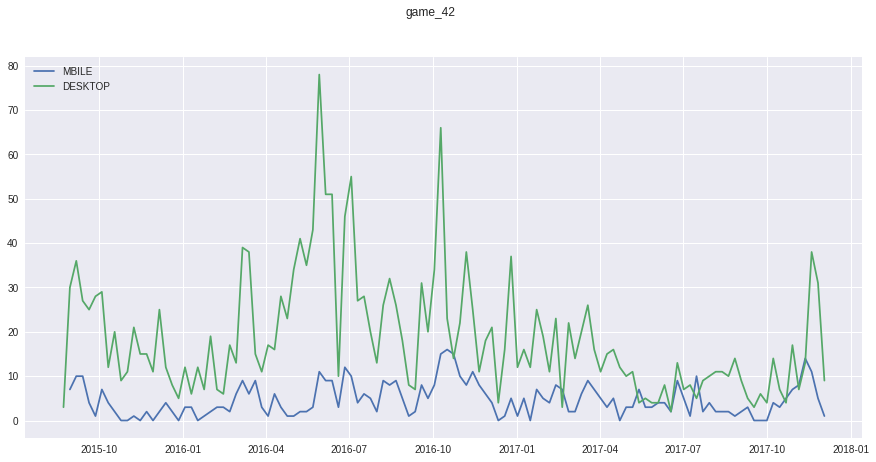

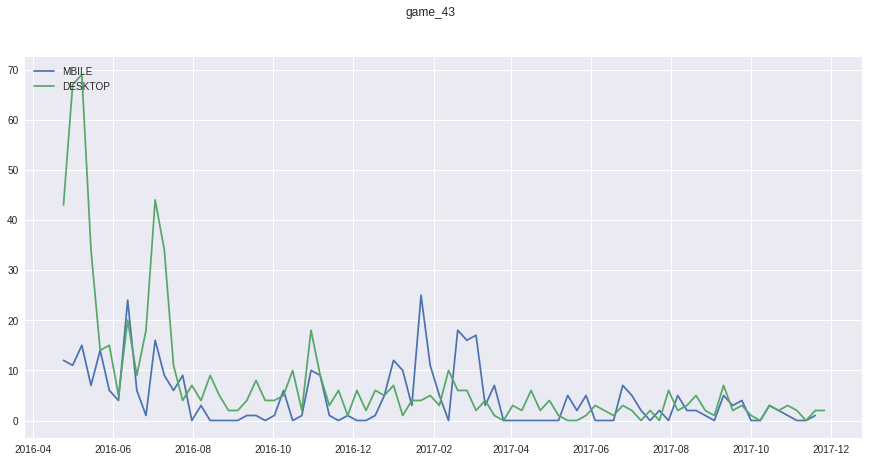

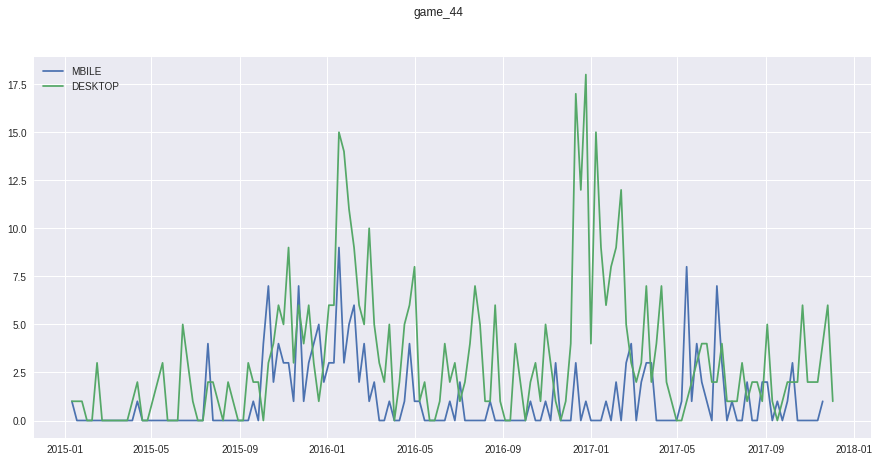

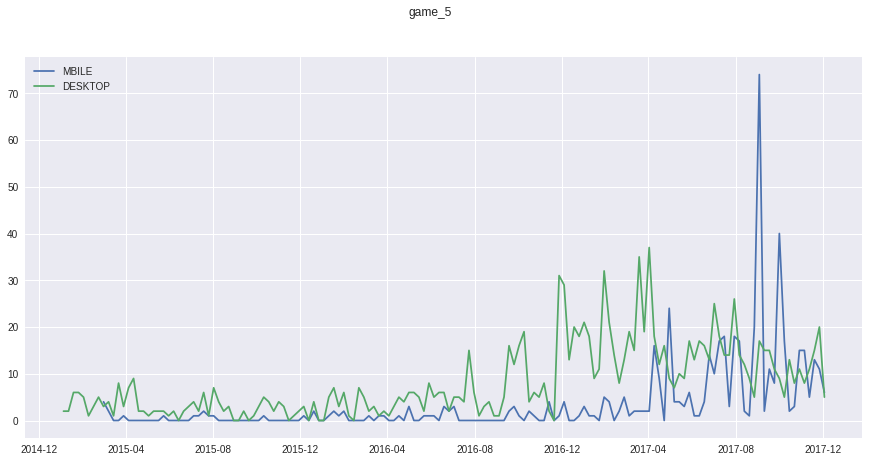

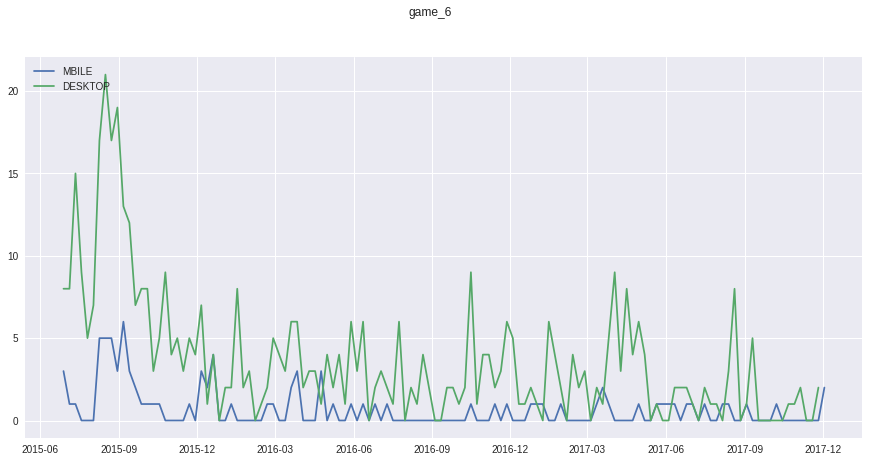

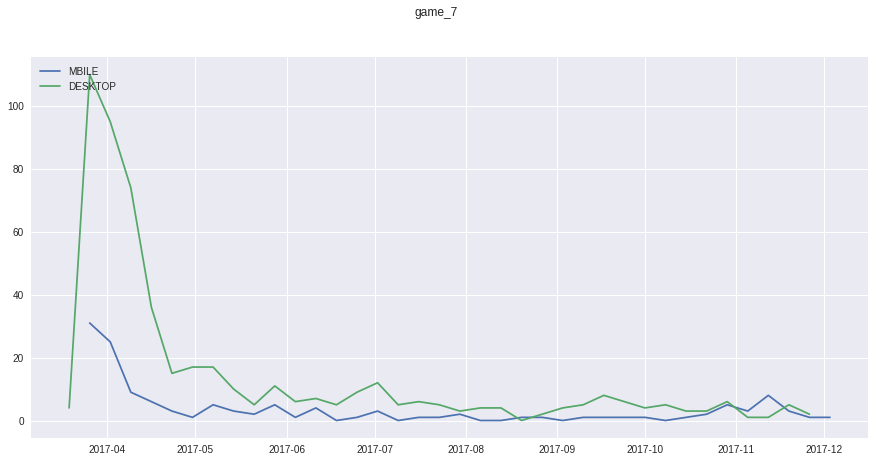

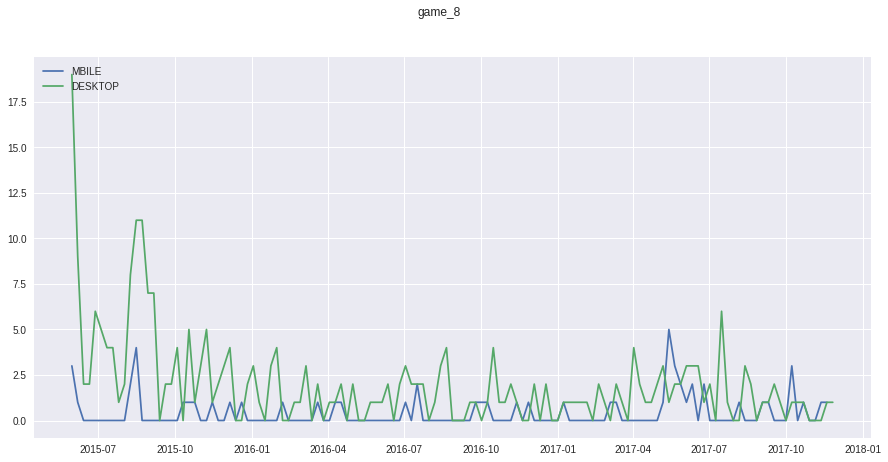

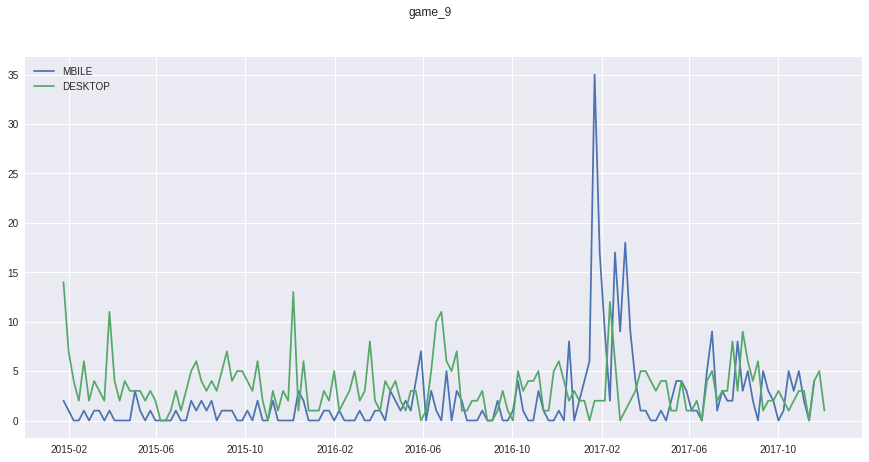

In [49]:
for selected_game in all_df.sort_values(by=['game'])['game'].unique():
    data1 = all_df[all_df.channel == 'MOBILE'] 
    data1 = data1[data1.game == selected_game].set_index('slice_from',drop=False)
    data1 = data1.groupby(pd.Grouper(freq='W'))['channel'].count()

    data2 = all_df[all_df.channel == 'DESKTOP'] 
    data2 = data2[data2.game == selected_game].set_index('slice_from',drop=False)
    data2 = data2.groupby(pd.Grouper(freq='W'))['channel'].count()

    # _= to hide <matplot.....>
    _ = plt.figure(figsize=(15,7)).suptitle(selected_game)
    _ = plt.plot(data1)
    _ = plt.plot(data2)
    _ = plt.legend(['MBILE','DESKTOP'], loc='upper left')
    _ = plt.show()



### Table of the most popular currency <a name="popular currency"></a>
#### sorted by number of bets

In [53]:
#group less popular currency to "Other"
currency_to_skip = ['CZK','PLN','AUD','CAD','DKK','CLP','NZD','HUF','BRL','CHF','RUB']

all_df['currency'] = all_df['currency'].apply(lambda x: "Other" if x in currency_to_skip  else x)
all_df.groupby(['currency'])[['bet_euro','win_euro','number_of_bets','profit_euro']]\
.sum().sort_values(by='number_of_bets', ascending=False)



,bet_euro,win_euro,number_of_bets,profit_euro
currency,,,,
EUR,7.768848e+06,7.372555e+06,3296891.0,396292.747600
SEK,9.091196e+05,8.283041e+05,170791.0,80815.507175
NOK,3.097830e+04,2.826481e+04,41277.0,2713.497070
TRY,3.959825e+05,3.654649e+05,25568.0,30517.557330
GBP,2.231534e+04,1.835582e+04,10545.0,3959.518188
USD,2.507657e+04,2.215395e+04,6283.0,2922.618478
Other,7.033312e+02,4.624327e+02,1432.0,240.898516


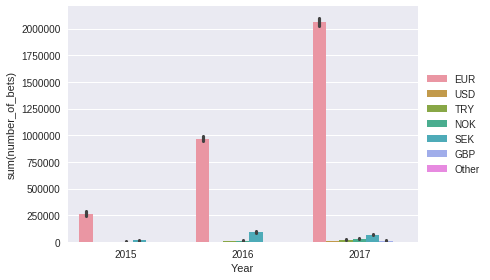

In [54]:
#plot this table
sns.barplot(x="Year", y="number_of_bets", data=all_df, estimator=sum, hue='currency')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.tight_layout();

#### Comment:
#### The currency from Norway is becoming less popular. The most users use Euro. Other currencies are: 'CZK', 'PLN', 'AUD', 'CAD', 'DKK', 'CLP', 'NZD', 'HUF', 'BRL', 'CHF', 'RUB'.

### Table of the most profitable currnecy <a name="profitable currnecy"></a>

In [55]:
all_df.groupby(['currency'])[['bet_euro','win_euro','number_of_bets','profit_euro']]\
.sum().sort_values(by='profit_euro', ascending=False)

,bet_euro,win_euro,number_of_bets,profit_euro
currency,,,,
EUR,7.768848e+06,7.372555e+06,3296891.0,396292.747600
SEK,9.091196e+05,8.283041e+05,170791.0,80815.507175
TRY,3.959825e+05,3.654649e+05,25568.0,30517.557330
GBP,2.231534e+04,1.835582e+04,10545.0,3959.518188
USD,2.507657e+04,2.215395e+04,6283.0,2922.618478
NOK,3.097830e+04,2.826481e+04,41277.0,2713.497070
Other,7.033312e+02,4.624327e+02,1432.0,240.898516


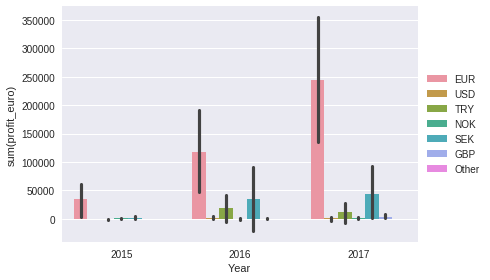

In [56]:
#plot this table
sns.barplot(x="Year", y="profit_euro", data=all_df, hue='currency', estimator=sum)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout();

#### Comment:
#### Users from Norway spend less money than from Turkey despite of 2 more number of the bet than for Turkey users.

### Table of 5 games with the most/minimal bets <a name="popular games"></a>

In [60]:
popular_game = pd.DataFrame(all_df.groupby('game')['number_of_bets'].sum().sort_values(ascending = False))
popular_game.head(5)
popular_game.tail(5)

,number_of_bets
game,
game_41,621582.0
game_16,446409.0
game_5,336163.0
game_42,253649.0
game_15,208681.0


,number_of_bets
game,
game_14,7335.0
game_12,2908.0
game_34,2493.0
game_32,2039.0
game_24,1760.0


### Table of 5 games with the biggest/smallest profit <a name="profitable games"></a>

In [59]:
profitable_game = pd.DataFrame(all_df.groupby('game')['profit_euro'].sum().sort_values(ascending = False))
profitable_game.head(5)
profitable_game.tail(5)

,profit_euro
game,
game_41,148042.889943
game_16,94149.708563
game_42,50356.099762
game_18,38809.335177
game_22,20449.847068


,profit_euro
game,
game_33,-2013.189638
game_40,-2658.177004
game_19,-3421.396037
game_1,-5742.191119
game_21,-8905.221134


### Table of 5 organization with the biggest/smallest profit <a name="profitable organization"></a>

In [61]:
profitable_organization = pd.DataFrame(all_df.groupby('organization')['profit_euro'].sum().sort_values(ascending = False))
profitable_organization.head(5)
profitable_organization.tail(5)

/home/arek/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'organization' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,profit_euro
organization,
organization_267,64034.486310
organization_196,54327.791860
organization_300,44588.148493
organization_108,37716.383532
organization_462,32904.802209


,profit_euro
organization,
organization_389,-338.150100
organization_162,-746.640000
organization_430,-2439.188710
organization_280,-2601.440000
organization_96,-6714.297977


### Table of 5 organization group with the biggest/smallest profit <a name="profitable organization group"></a>

In [62]:
profitable_organization_group = pd.DataFrame(all_df.groupby('organization_group')['profit_euro']\
                                             .sum().sort_values(ascending = False))
profitable_organization_group.head(5)
profitable_organization_group.tail(5)

,profit_euro
organization_group,
group_13,64743.359687
group_48,64034.486310
group_9,54390.981756
group_34,49451.900475
group_50,44588.148493


,profit_euro
organization_group,
group_51,-61.050000
group_67,-94.390000
group_3,-338.150100
group_7,-2601.440000
group_71,-4749.884377


### Table of 5 campaign with the biggest/smallest profit <a name="profitable campaign"></a>

In [63]:
profitable_campaign = pd.DataFrame(all_df[all_df.campaignid > 0].groupby('campaignid')['profit_euro']\
                                   .sum().sort_values(ascending = False))
profitable_campaign.head(5)
profitable_campaign.tail(5)

,profit_euro
campaignid,
1708241425520500175,3404.074889
1710061230530300177,3156.294355
1707251050160300184,1314.612893
1710271512450500305,1228.709800
1708241424010100188,1170.440000


,profit_euro
campaignid,
1710260759420000185,-265.767498
1707281105230400183,-282.540000
1706270820460900203,-296.170000
1706011302290500178,-408.855400
1710181549100300202,-416.040000


### Table of 5 the best/worst player <a name="best player"></a>

In [64]:
all_df['user_profit_euro'] = all_df['win_euro'] - all_df['bet_euro']
userid_profit = pd.DataFrame(all_df.groupby(['userid','number_of_bets'])['user_profit_euro'].sum().sort_values())
userid_profit.head(5)
userid_profit.tail(5)

user_profit_euro
userid              number_of_bets                  
1711091701560300176 323                -18933.600000
1707271024220100223 488                -13500.000000
1603052314408300303 1209               -11108.610617
                    281                 -9455.558091
1601112113152400306 1076                -7713.500000

,,user_profit_euro
userid,number_of_bets,
1603052314408300303,122,10239.561471
1711091701560300176,460,11100.000000
1511140936547100173,710,11779.340000
1601262139055800364,466,11993.000000
1602262242192500261,1,13120.000000


### Chart of behavior of the best player <a name="best player "></a>
#### Comment:
#### The best player won and stopped play.

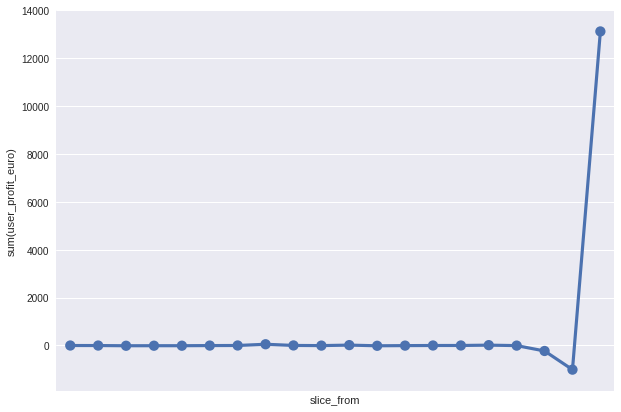

In [66]:
selected_userid = 1602262242192500261
data = all_df[all_df.userid == selected_userid].set_index('slice_from',drop=False)

plt.figure(figsize=(10,7))
sns.pointplot(x='slice_from', y="user_profit_euro", data=data, estimator= sum).set(xticks=[]);

### Chart of behavior of the worst player <a name="worst player "></a>

#### Comment:
#### Peaks on the chart when user spent all money which he won.

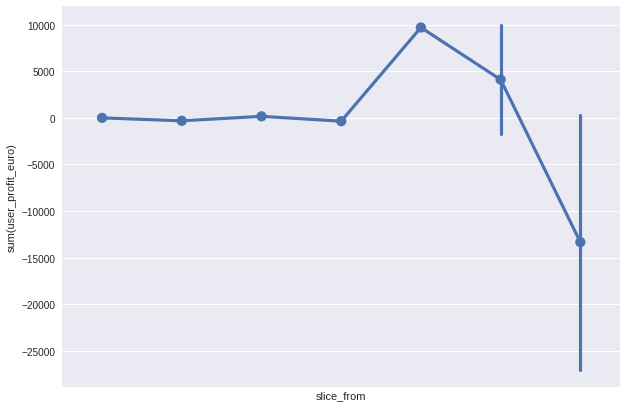

In [67]:
selected_userid = 1707271024220100223
data = all_df[all_df.userid == selected_userid].set_index('slice_from',drop=False)
data.sort_index(inplace=True)

plt.figure(figsize=(10,7))
sns.pointplot(x='slice_from', y="user_profit_euro", data=data, estimator= sum).set(xticks=[]);

## Prediction <a name="Prediction"></a>

#### Comment:
#### Due to the lack of a linear relationship in the data  and business knowledge, it was attempted to group users due to how many bets they placed and what profits they had. This allows to find an addicted person (legal requirement) as well as the best players and it can help to personalize the offers of other games. The classifications were chosen  unsupervised classification K Means method. As a result, 20 groups were obtained.

In [68]:
dataset = all_df[['userid','number_of_bets','bet_euro','user_profit_euro']].reset_index(drop=True)
dataset = dataset.groupby("userid").sum()

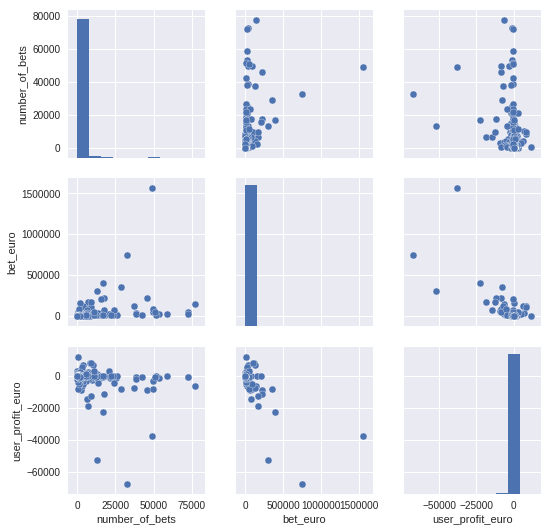

In [69]:
sns.pairplot(dataset)
plt.show();

In [70]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

np.random.seed(2018)


In [71]:
# Convert DataFrame to matrix
from sklearn import preprocessing


#dataset_columns = dataset.columns
#x = dataset.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#dataset = pd.DataFrame(x_scaled, columns= dataset_columns)


dataset = dataset.reset_index(drop=True)

matrix = dataset.as_matrix()
# Using sklearn
model = KMeans(n_clusters=20, algorithm = 'full')
model.fit(matrix)
# Get cluster assignment labels
labels = model.labels_
# Format results as a DataFrame
clusters = pd.DataFrame(data=labels, columns=['cluster'])
result = dataset.merge(clusters, left_index=True, right_index=True)


KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

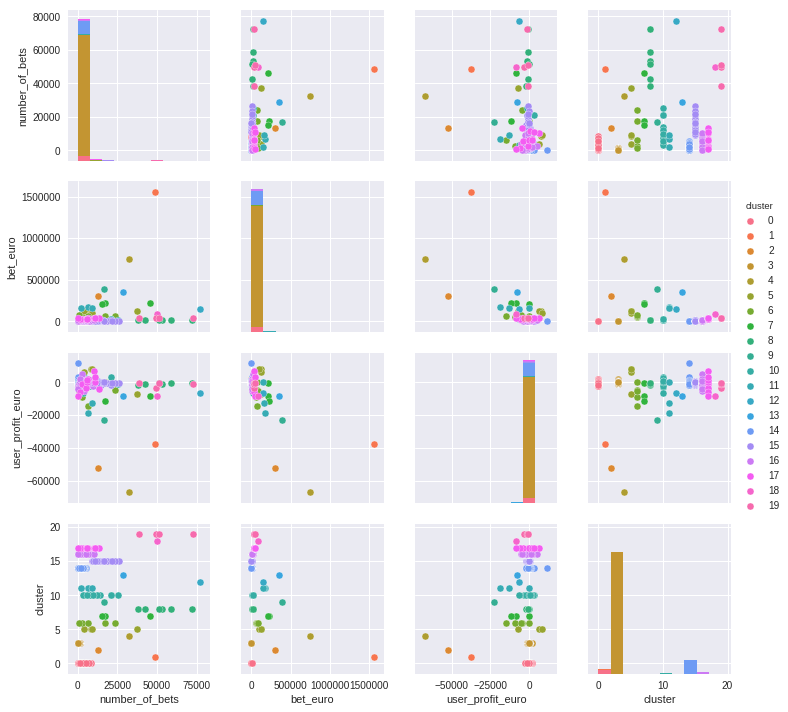

In [72]:
sns.pairplot(result, hue="cluster")
plt.show();

In [73]:
result['users_count'] = 1
result.groupby("cluster").sum()

,number_of_bets,bet_euro,user_profit_euro,users_count
cluster,,,,
0,485476.0,7.068322e+05,-35336.217954,143
1,48819.0,1.558859e+06,-37712.830800,1
2,13122.0,3.020102e+05,-52218.236000,1
3,553911.0,4.471849e+05,-76468.150687,4064
4,32407.0,7.454026e+05,-67211.661089,1
5,58894.0,4.723157e+05,15041.312200,4
6,51085.0,3.480933e+05,-33707.087700,5
7,78503.0,6.483798e+05,-20577.674479,3
8,316747.0,1.040665e+05,-5262.748300,6
